## <b> Bitcoin Analysis </b>

"Crypto has proven not to be a diversifying asset! Its not a safe heaven."


In [3]:
# Packages used
from datetime import datetime, date
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from math import sqrt
import warnings


warnings.filterwarnings('ignore')
mpl.style.use('seaborn-darkgrid')


The largest economies of the world were challenged during the COVID-19 pandemic. Because of lockdowns, companies had to shutdown their operations or send many of their workers home. That resulted in a massive unemployment rate and a economic fallout that was never seen before.

In order to stimulate the economy, the Central Banks around the world adopted a loose monetary policy. Interest rates were reduced to record lows and many countries literally printed money to help their people, who couldn't go to work or were unemployed at that time.

During lockdowns, poeple were desperate to find new alternatives to generate income. One way people found interesting was trading stocks and cryptocurrencies.

In [4]:
stocks_crypto_trend = pd.read_csv("stocks_and_crypto.csv", parse_dates=True, index_col='Week' )

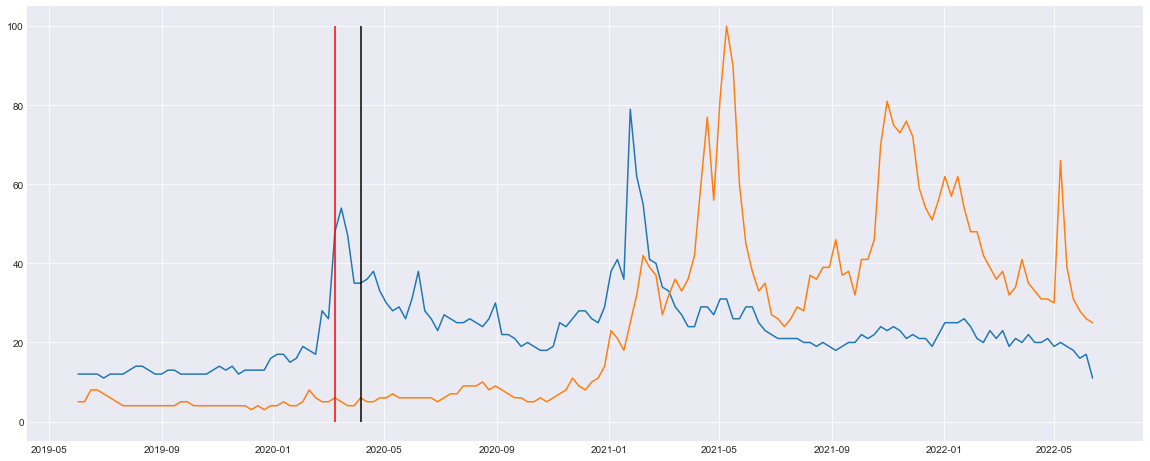

In [5]:
# Plotting Google Trends Data
fig, ax = plt.subplots(figsize=(20,8))

# Setting the plot data
ax.plot(stocks_crypto_trend['stocks'], label='Google Search Trend: "stocks"')
ax.plot(stocks_crypto_trend['crypto'], label = 'Google Search Trend: "crypto"')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['3/8/2020'], ymax=100, ymin=0, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['4/5/2020'], ymax=100, ymin=0, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')


None

Google Trends shows how frequently a given search term is entered into Google's search. It ranges from  0 to 100, where 0 shows the lowest volume in searches and 100 shows the highest volume in searches.


The chart above shows the search trend for the words "stocks" and "crypto".

The World Health Organization declared COVID-19 as pandamic in March 11th and we can see in the chart the first sign of people looking for alternative ways of income. 
In addition, even though the interest for stocks during the first days of the COVID-19 outbreak, people didn't look very confortable to spend their money on risky assets since Stocks and Bitcoin were getting during that period. 

In [6]:
## Price data 2020

# Bicoin price data (During Pandemic)
btc_usd_pandemic = web.DataReader('BTC-USD', data_source='yahoo', start='2019-06-23', end='2020-06-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})

# SP500 price data (During Pandemic)
sp500_pandemic = web.DataReader('^GSPC', data_source='yahoo', start='2019-06-23', end='2020-06-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'SP500'})

# NASDAQ 100 price data (During Pandemic)
nasdaq_pandemic = web.DataReader('^IXIC', data_source='yahoo', start='2019-06-23', end='2020-06-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'NASDAQ100'})

# Prices dataframe
pandemic_df = pd.DataFrame([btc_usd_pandemic['BTCUSD'], sp500_pandemic['SP500'], nasdaq_pandemic['NASDAQ100']]).transpose().dropna()

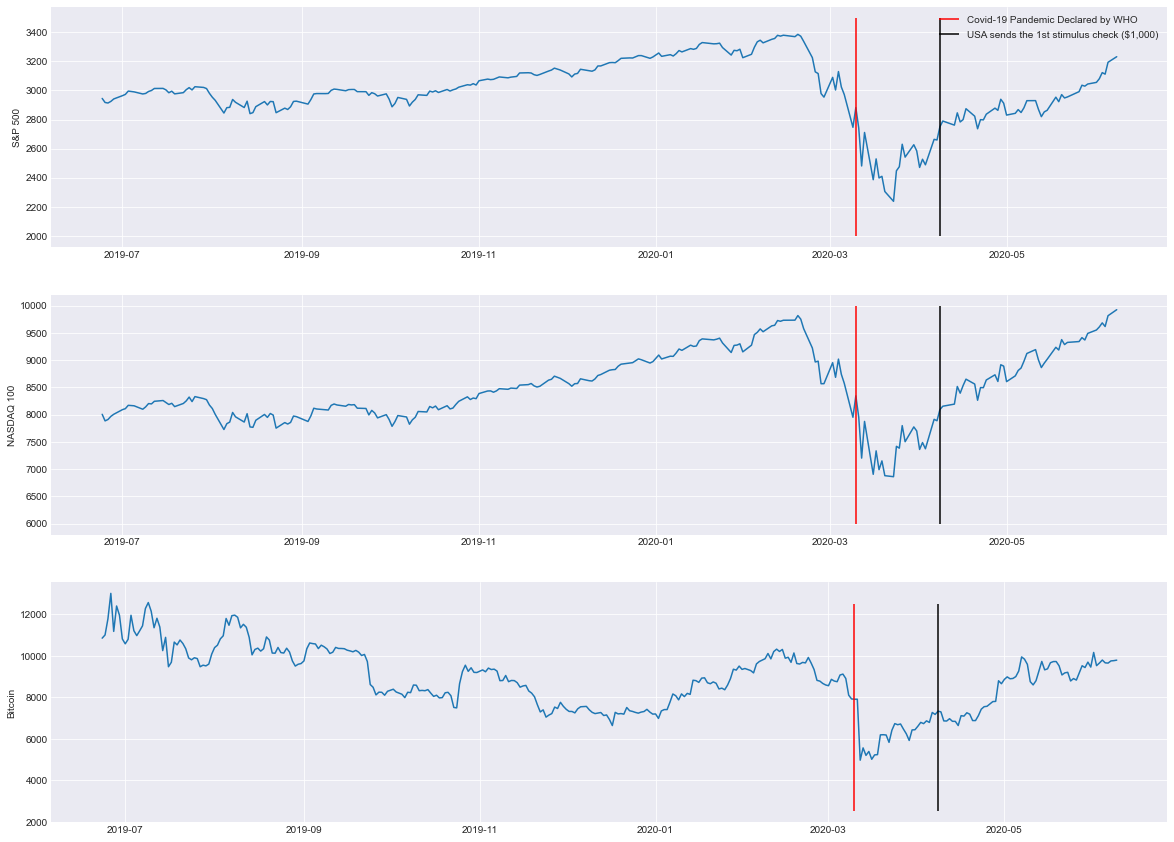

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

# SP 500
ax1.plot(sp500_pandemic)
ax1.vlines(sp500_pandemic.index.to_frame().loc['3/10/2020'], ymax=3500, ymin=2000, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax1.vlines(sp500_pandemic.index.to_frame().loc['4/8/2020'], ymax=3500, ymin=2000, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax1.legend()
ax1.set_ylabel("S&P 500")

# NASDAQ 100
ax2.plot(nasdaq_pandemic)
ax2.vlines(nasdaq_pandemic.index.to_frame().loc['3/10/2020'], ymax=10000, ymin=6000, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax2.vlines(nasdaq_pandemic.index.to_frame().loc['4/8/2020'], ymax=10000, ymin=6000, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax2.set_ylabel("NASDAQ 100")

# Bitcoin
ax3.plot(btc_usd_pandemic)
ax3.vlines(btc_usd_pandemic.index.to_frame().loc['3/10/2020'], ymax=12500, ymin=2500, color= 'red', label="Covid-19 Pandemic Declared by WHO", linestyle='solid')
ax3.vlines(btc_usd_pandemic.index.to_frame().loc['4/8/2020'], ymax=12500, ymin=2500, color= 'black', label="USA sends the 1st stimulus check ($1,000)", linestyle='solid')
ax3.set_ylabel("Bitcoin")

None

It is important to remember that there was now way to know if risky assets were going to recover or were heading down during that time. 

People were still scared about the massive declines in prices they experienced during the beginning pandemic. 

We can see the Drawdown for each asset below:

## This needs to be fixed - change .max() to the pre pandemic peak date

In [8]:
for asset in pandemic_df.columns:
    print(f'The Drawdown for {asset} during the pandemic was: {format(((min(pandemic_df[asset]) / max(pandemic_df[asset]))-1)*100,".2f")}%')

The Drawdown for BTCUSD during the pandemic was: -61.81%
The Drawdown for SP500 during the pandemic was: -33.92%
The Drawdown for NASDAQ100 during the pandemic was: -30.87%


However, people's behavior towards risk changed after they received the second and third stimulus check.


As people realized that governments around the world, specially the U.S., were printing and distributing so much money, people started to look for risky investments. 

In the plot below, we can see that search trend for stocks reached all time high after people received their second stimulus check. The search trend for "crypto" were also trending higher, but not as much as stocks.

However, after people received their third stimulus check. The search trend for "crypto" exploded higher. The search frequency for crypto after the stimulus third check was higher than the frequency for stocks after the second stimulus check. As we can see below.

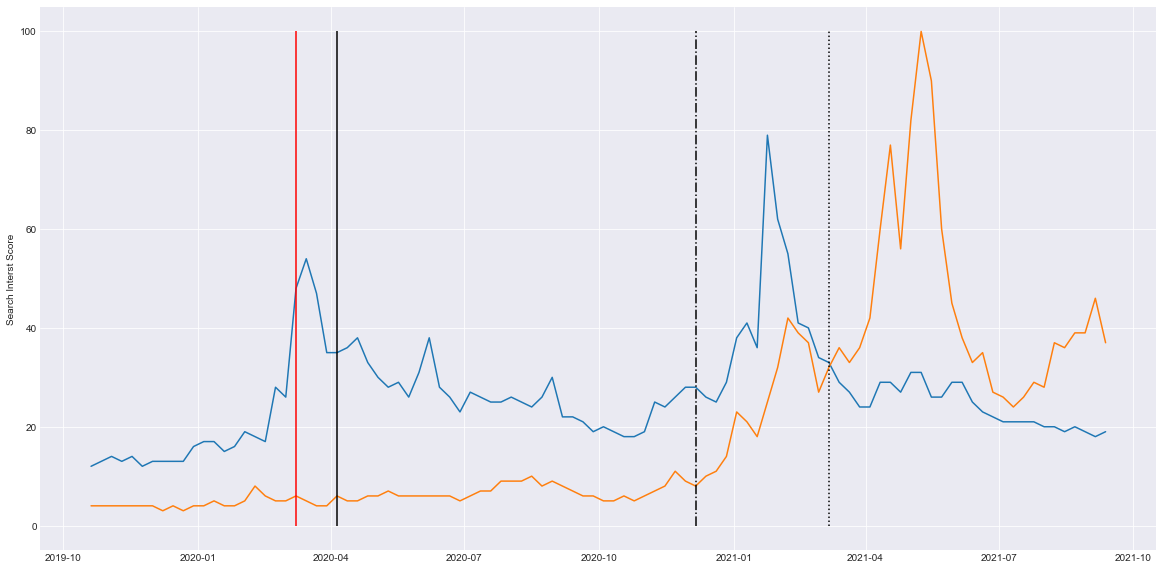

In [9]:
# Plotting Google Trends Data
fig, ax = plt.subplots(figsize=(20,10))

# Setting the plot data
ax.plot(stocks_crypto_trend['stocks'][20:120], 
    label='Google Search Trend: "stocks"')
ax.plot(stocks_crypto_trend['crypto'][20:120], 
    label = 'Google Search Trend: "crypto"')

# Plotting important events
ax.vlines(stocks_crypto_trend.index.to_frame().loc['3/8/2020'], 
        ymax=100, 
        ymin=0, 
        color= 'red', 
        label="Covid-19 Pandemic Declared by WHO", 
        linestyle='solid')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['4/5/2020'], 
        ymax=100, 
        ymin=0, 
        color= 'black', 
        label="USA sends the 1st stimulus check ($1,000)", 
        linestyle='solid')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['12/6/2020'], 
        ymax=100, 
        ymin=0, 
        color= 'black', 
        label="USA sends the 2nd stimulus check ($600)", 
        linestyle='dashdot')
ax.vlines(stocks_crypto_trend.index.to_frame().loc['3/7/2021'], 
        ymax=100, 
        ymin=0, 
        color= 'black', 
        label="USA sends the 3rd stimulus check($1,400)", 
        linestyle='dotted')

# Plot label
ax.set_ylabel("Search Interst Score")

None

Analyzing this data makes it clear that people were looking for risky assets. However, it also raises the following question: <b> Why people were so interested in cryptocurrencies? </b>

# Understanding the interest behind Bitcoin and other cryptocurrencies

### Price Analysis
It is totally understandable that people would like to increase the risk of their portfolio during periods of easy money. 

However, that might not be the only reason people invested in Bitcoin and other cryptocurrencies.

To have a deep understanding of that interest, let's take a look at the price chart for stocks and bitcoin one year after the pandemic.

In [10]:
## Price data - One year after pandemic

# Bicoin price data (During Pandemic)
btc_usd_pandemic_2nd = web.DataReader(
        'BTC-USD', 
        data_source='yahoo', 
        start='2020-02-23', 
        end='2021-04-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})

# SP500 price data (During Pandemic)
sp500_pandemic_2nd = web.DataReader(
        '^GSPC', 
        data_source='yahoo', 
        start='2020-02-23', 
        end='2021-04-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'SP500'})

# NASDAQ 100 price data (During Pandemic)
nasdaq_pandemic_2nd = web.DataReader(
        '^IXIC', 
        data_source='yahoo', 
        start='2020-02-23', 
        end='2021-04-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'NASDAQ100'})

# Prices dataframe
post_pandemic_df = pd.DataFrame([btc_usd_pandemic_2nd['BTCUSD'], sp500_pandemic_2nd['SP500'], nasdaq_pandemic_2nd['NASDAQ100']]).transpose().dropna()


# Calculating % Price increase
btc_usd_pandemic_2nd['%_Variation'] = (btc_usd_pandemic_2nd['BTCUSD'] / btc_usd_pandemic_2nd['BTCUSD'].iloc[0]) - 1
sp500_pandemic_2nd['%_Variation'] = (sp500_pandemic_2nd['SP500'] / sp500_pandemic_2nd['SP500'].iloc[0]) - 1
nasdaq_pandemic_2nd['%_Variation'] = (nasdaq_pandemic_2nd['NASDAQ100'] / nasdaq_pandemic_2nd['NASDAQ100'].iloc[0]) - 1


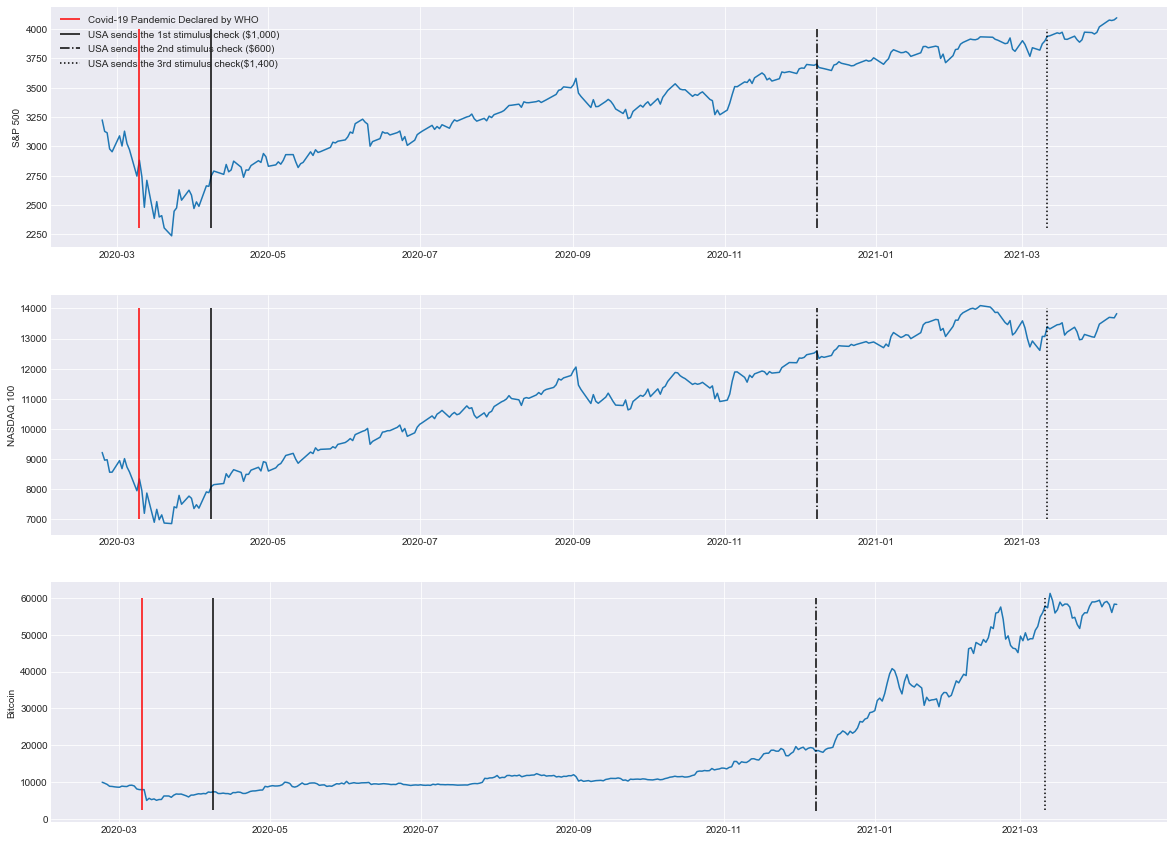

In [11]:
# Price data plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,15))

# SP 500
ax1.plot(sp500_pandemic_2nd['SP500'])
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['3/10/2020'], 
        ymax=4000, 
        ymin=2300, 
        color= 'red', 
        label="Covid-19 Pandemic Declared by WHO", 
        linestyle='solid')
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['4/8/2020'], 
        ymax=4000, 
        ymin=2300, 
        color= 'black', 
        label="USA sends the 1st stimulus check ($1,000)", 
        linestyle='solid')
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['12/8/2020'], 
        ymax=4000, 
        ymin=2300, 
        color= 'black', 
        label="USA sends the 2nd stimulus check ($600)", 
        linestyle='dashdot')
ax1.vlines(sp500_pandemic_2nd.index.to_frame().loc['3/11/2021'], 
        ymax=4000, 
        ymin=2300, 
        color= 'black', 
        label="USA sends the 3rd stimulus check($1,400)", 
        linestyle='dotted')
ax1.legend()
ax1.set_ylabel("S&P 500")

# NASDAQ 100
ax2.plot(nasdaq_pandemic_2nd['NASDAQ100'])
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['3/10/2020'], 
        ymax=14000, 
        ymin=7000, 
        color= 'red', 
        linestyle='solid')
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['4/8/2020'], 
        ymax=14000, 
        ymin=7000, 
        color= 'black', 
        linestyle='solid')
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['12/8/2020'], 
        ymax=14000, 
        ymin=7000, 
        color= 'black', 
        linestyle='dashdot')
ax2.vlines(nasdaq_pandemic_2nd.index.to_frame().loc['3/11/2021'], 
        ymax=14000, 
        ymin=7000, 
        color= 'black', 
        linestyle='dotted')
ax2.set_ylabel("NASDAQ 100")

# Bitcoin
ax3.plot(btc_usd_pandemic_2nd['BTCUSD'])
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['3/10/2020'], 
        ymax=60000, 
        ymin=2500, 
        color= 'red', 
        linestyle='solid')
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['4/8/2020'], 
        ymax=60000, 
        ymin=2500, 
        color= 'black', 
        linestyle='solid')
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['12/8/2020'], 
        ymax=60000, 
        ymin=2000, 
        color= 'black', 
        linestyle='dashdot')
ax3.vlines(btc_usd_pandemic_2nd.index.to_frame().loc['3/11/2021'], 
        ymax=60000, 
        ymin=2500, 
        color= 'black', 
        linestyle='dotted')
ax3.set_ylabel("Bitcoin")

None

Although the price movements looks similar in grid above, it is important to compare it in percentage points to have a better view of the strength of each movement.

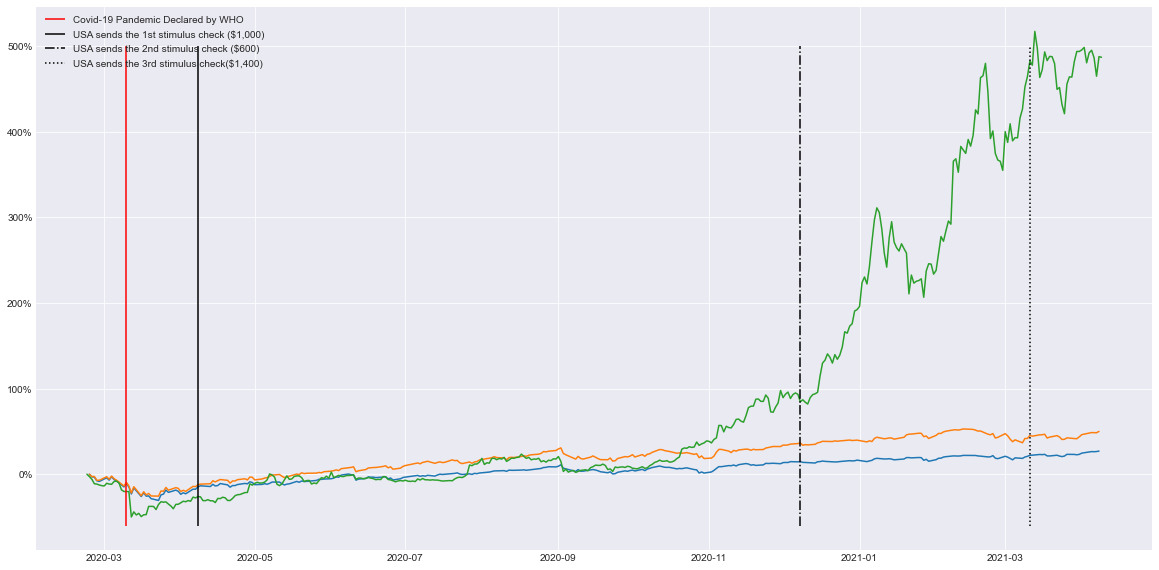

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(sp500_pandemic_2nd['%_Variation'])
ax.plot(nasdaq_pandemic_2nd['%_Variation'])
ax.plot(btc_usd_pandemic_2nd['%_Variation'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.vlines(sp500_pandemic_2nd.index.to_frame().loc['3/10/2020'], 
        ymax=5, 
        ymin=-.6, 
        color= 'red', 
        label="Covid-19 Pandemic Declared by WHO", 
        linestyle='solid')
ax.vlines(sp500_pandemic_2nd.index.to_frame().loc['4/8/2020'], 
        ymax=5, 
        ymin=-.6, 
        color= 'black', 
        label="USA sends the 1st stimulus check ($1,000)", 
        linestyle='solid')
ax.vlines(sp500_pandemic_2nd.index.to_frame().loc['12/8/2020'], 
        ymax=5, 
        ymin=-.6, 
        color= 'black', 
        label="USA sends the 2nd stimulus check ($600)", 
        linestyle='dashdot')
ax.vlines(sp500_pandemic_2nd.index.to_frame().loc['3/11/2021'], 
        ymax=5, 
        ymin=-.6, 
        color= 'black', 
        label="USA sends the 3rd stimulus check($1,400)", 
        linestyle='dotted')
ax.legend()

None

Futhermore, we can get a even better understanding of the price action by analysing how much each asset increased in value using their lows as starting point.

In [13]:
for asset in post_pandemic_df.columns:
    perf = format(((post_pandemic_df[asset].iloc[-1] / post_pandemic_df[asset].min())-1) * 100, ".2f")
    print(f'Performance for {asset} from pandemic lows to the 2nd stimulus check: {perf} %')

Performance for BTCUSD from pandemic lows to the 2nd stimulus check: 1073.33 %
Performance for SP500 from pandemic lows to the 2nd stimulus check: 83.12 %
Performance for NASDAQ100 from pandemic lows to the 2nd stimulus check: 101.57 %


In [14]:
for asset in post_pandemic_df.columns:
        perf = format(((post_pandemic_df[asset].loc["3/11/2021"] / post_pandemic_df[asset].loc["12/8/2020"])-1) * 100, ".2f")
        print(f'Performance for {asset} from the 2nd stimuls to the 3rd stimulus check: {perf} %')

Performance for BTCUSD from the 2nd stimuls to the 3rd stimulus check: 215.51 %
Performance for SP500 from the 2nd stimuls to the 3rd stimulus check: 6.40 %
Performance for NASDAQ100 from the 2nd stimuls to the 3rd stimulus check: 6.48 %


In [15]:
for asset in post_pandemic_df.columns:
    perf = format(((post_pandemic_df[asset].loc["3/11/2021"] / post_pandemic_df[asset].min())-1) * 100, ".2f")
    print(f'Performance for {asset} from pandemic lows to the 3rd stimulus check: {perf} %')

Performance for BTCUSD from pandemic lows to the 3rd stimulus check: 1062.90 %
Performance for SP500 from pandemic lows to the 3rd stimulus check: 76.07 %
Performance for NASDAQ100 from pandemic lows to the 3rd stimulus check: 95.30 %


As we can see, all risky assets had a great performance from the pandemic lows until people started receiving the 2nd stimulus check. Bitcoin was the best performer and this is understandable since it is way more volatile than stocks.

However, take a look at the performance differences from the 2nd stimulus check to the 3rd stimulus check. In addition, pay attention to the accumulated performance differences from pandemic lows to the third stimulus check. 

After analyzing these numbers, we can identify the signs of euphoria in the crypto markets where prices are not aligned to the fundamentals of a security or asset.

### The Fear of Missing Out (FOMO) Effect

There is an famous quote in the markets that is often attributed to Mark Twain

<b> "History does not repeat itself, but it rhymes." </b>

The FOMO effect we are seeing now has happened before with NASDAQ, event that is known by "The DotCom Bubble"

Back in late 90s and early 2000s, technology stocks soared higher with the thesis that the internet would be the future of the society. 
That thesis has proven to be true years later. However, the majority of people who invested in technology stocks during that period of euphoria went broke by late 2002 when tech stocks finally reversed the down trend.

Back then, investors saw impressive stock movements upwards. The majority of IPOs were from new technology companies that didn't even generate revenue and people were becoming millionaries so fast that it was hard to hold the emotions and not pour money on technology stocks. 

I need to ask to the reader. Does that sounds familiar to you? 

Let's go over some data

### Cryptomarkets vs DotCom Bubble
Before developing this idea. I have to say that I do believe a FOMO effect has been generated in the stock markets as well but not as intese as it was in the cryptomarkets.

One characteristc of the DotCom Bubble was the sudden creation of new technology stocks that didn't have anything other than a powerpoint presentation.

According to CoinMarketCap, the number of LISTED cryptocurrencies went from 2028 in 2020 to 10263 coins in March, 2022. 

In [16]:
# Number of cryptocurrencies per yaer
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
quantity = [7, 67, 501, 572, 636, 1359, 2086, 2403, 4154, 10363]
num_listed_cryptos = pd.DataFrame([years, quantity]).transpose()
num_listed_cryptos.columns = ['Year', 'Number']
num_listed_cryptos = num_listed_cryptos.set_index('Year')

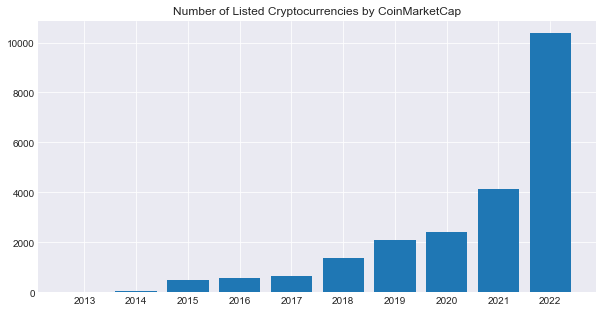

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(num_listed_cryptos.index, num_listed_cryptos['Number'])
ax.set_title("Number of Listed Cryptocurrencies by CoinMarketCap")
plt.xticks(years)
None

The vast majority of those coins does not have any real functionality, but it seems that this is not an issue for crypto investors. 

What seems to be driving investors to pour their money on cryptocurrency is the hope that they will easily become millionaires. In other words, these investors are now greedy enough to pour their money on whatever coin is trending on social media.

Elon Musk's tweets, for example,  had a huge impact on Bitcoin and Dogecoin prices.


In [18]:
# Bicoin price data (During Pandemic)
btc_usd_fomo = web.DataReader('BTC-USD', data_source='yahoo', start='2020-02-23', end='2021-07-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})
doge_usd_fomo = web.DataReader('DOGE-USD', data_source='yahoo', start='2020-02-23', end='2021-07-08')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})

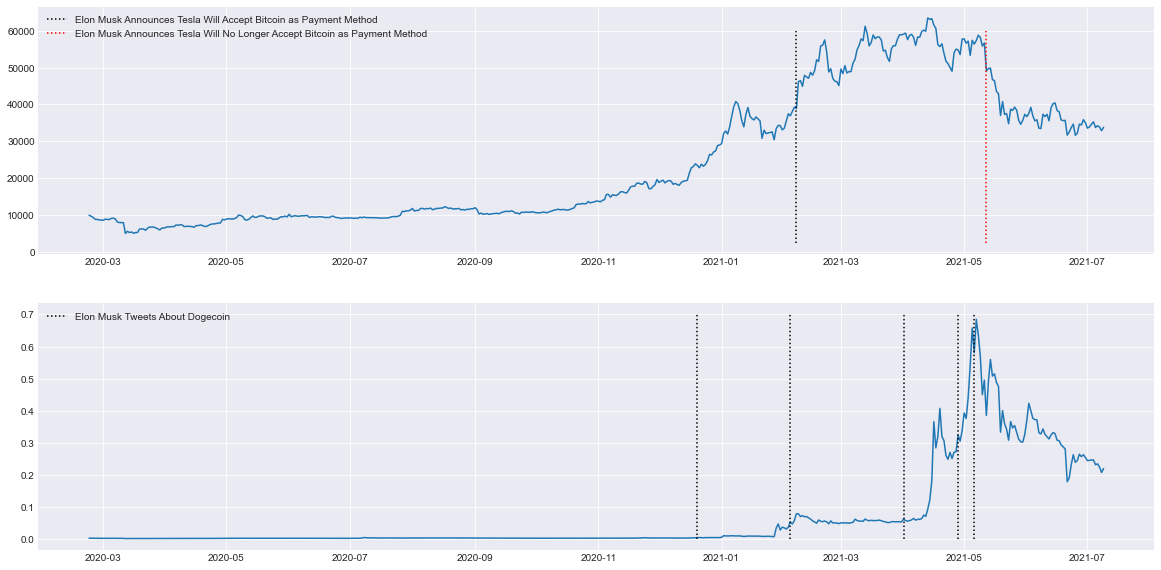

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

# Bitcoin Elon Musk Events
ax1.plot(btc_usd_fomo)
ax1.vlines(btc_usd_fomo.index.to_frame().loc['2/7/2021'], 
        ymax=60000, ymin=2500,
        color= 'black', 
        label="Elon Musk Announces Tesla Will Accept Bitcoin as Payment Method", 
        linestyle='dotted') 
ax1.vlines(btc_usd_fomo.index.to_frame().loc['5/12/2021'], 
        ymax=60000, ymin=2500, 
        color= 'red', label="Elon Musk Announces Tesla Will No Longer Accept Bitcoin as Payment Method", 
        linestyle='dotted')
ax1.legend() 


# Dogecoin Elon Musk tweets
ax2.plot(doge_usd_fomo)
ax2.vlines(doge_usd_fomo.index.to_frame().loc['12/20/2020'], ymax=0.7, ymin=0, color= 'black', label="Elon Musk Tweets About Dogecoin", linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['2/4/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['4/1/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['4/28/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.vlines(doge_usd_fomo.index.to_frame().loc['5/6/2021'], ymax=0.7, ymin=0, color= 'black', linestyle='dotted')
ax2.legend()

None

If social media is so relevant to cryptocurrencies, we can also assume that most of its investors have the same age as most of social media users. To make a conclusion regarding this thesis, I will be  analyzing the age distribution for the major social media platforms and bitcoin.

In [20]:
instagram_users = pd.read_csv('instagram_users.csv', index_col='Age')
tiktok_users = pd.read_csv('tiktok_users.csv', index_col='Age')
facebook_users = pd.read_csv('facebook_users.csv', index_col='Age')
twitter_users = pd.read_csv('twitter_users.csv', index_col='Age')
bitcoin_investors = pd.read_csv('coin-dance-demographics-age.csv', index_col='Label')

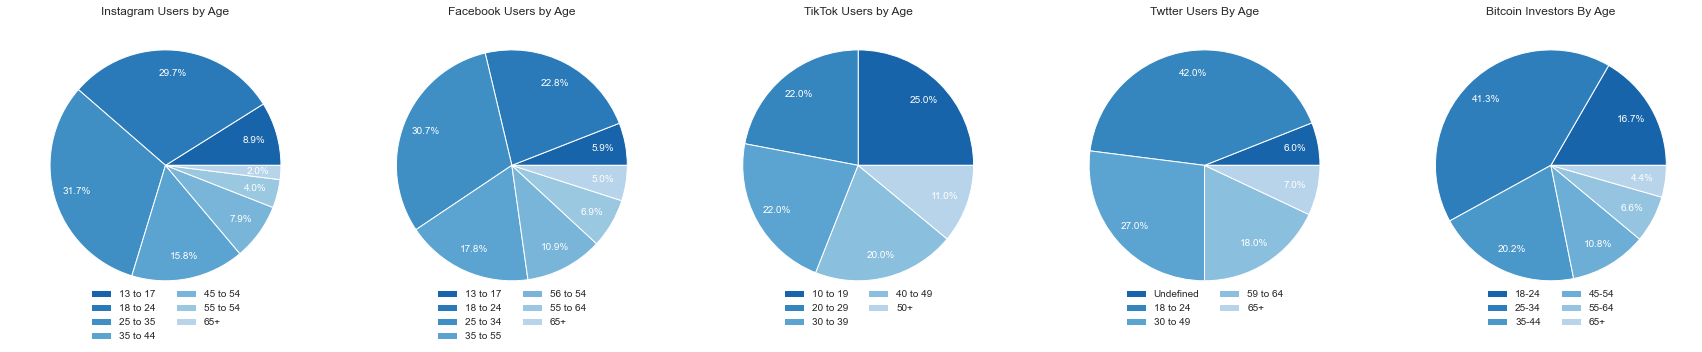

In [21]:
# Plotting a Pie Chart for the data
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 15))

# Instagram 
ax1.pie(instagram_users['Instagram'], 
    autopct='%1.1f%%',
    pctdistance=.8, 
    labels=instagram_users.index,
    textprops={'color':"w"},
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
    colors = plt.get_cmap('Blues_r')(np.linspace(0.2, 0.7, len(instagram_users['Instagram']))))
ax1.set_title('Instagram Users by Age')
ax1.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0.1), ncol=2)

# Facebook
ax2.pie(facebook_users['Facebook'], 
    autopct='%1.1f%%',
    pctdistance=.8, 
    labels=facebook_users.index,
    textprops={'color':"w"},
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
    colors=plt.get_cmap('Blues_r')(np.linspace(0.2, 0.7, len(facebook_users['Facebook']))))
ax2.set_title('Facebook Users by Age')
ax2.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0.1), ncol=2)

# TikTok
ax3.pie(tiktok_users['TikTok'], 
    autopct='%1.1f%%',
    pctdistance=.8, 
    labels=tiktok_users.index,
    textprops={'color':"w"},
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
    colors=plt.get_cmap('Blues_r')(np.linspace(0.2, 0.7, len(tiktok_users['TikTok']))))
ax3.set_title('TikTok Users by Age')
ax3.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0.1), ncol=2)

# Twitter
ax4.pie(twitter_users['Twitter'], 
    autopct='%1.1f%%',
    pctdistance=.8,
    labels=twitter_users.index,
    textprops={'color':"white"},
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
    colors=plt.get_cmap('Blues_r')(np.linspace(0.2, 0.7, len(twitter_users['Twitter']))))
ax4.set_title('Twtter Users By Age')
ax4.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0.1), ncol=2)

#Bitcoin
ax5.pie(bitcoin_investors['Value'],
    autopct='%1.1f%%',
    pctdistance=.8,
    labels=bitcoin_investors.index,
    textprops={'color':'white'},
    wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
    colors=plt.get_cmap('Blues_r')(np.linspace(0.2,0.7, len(bitcoin_investors['Value']))))
ax5.set_title('Bitcoin Investors By Age')
ax5.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 0.1), ncol=2)

None

As we can see, all pie charts share a similar pattern. 

The dark blue colors, represented by lower user ages, are predominant in all pie charts. This means that most of cryptocurrency investors are social media users and they are more likely to make decisions on what is trending on their favorite platform rether than take time to study and understand what they are putting their money into.

Back in early 2000s there were no social media, still, the idea that people could get rich by investing in the 'future' easily spread throughout society. How does not want to get super rich and super fast after all?

Social media is full of people pretending to be rich, but this analysis is not about judging people's ethic values. The danger I want to point here is that social media allows information (good or bad) to be shared unimaginably faster than two decades before. The chances are that misinformation and greed have infected the crypto markets and that trapped people in a fary tale that might not have a happy ending.

# Technical Analysis: Daily Volume and Price Profile

To conclude this section. I would like to analyse Bitcoin's Volume and Market Profile.

The Volume Indicator is a very common and well known market indicator that will give a visual representation of the trading activity for a given day.

The Market Profile Indicator is not a common indicator, but it is very useful for identifying relevant price points of a given asset based on the trading volume at a given price. The one I will be using here is an approximation of a Market Profile that will be based on the price trading frequency rether than the actual volume for each price. Even though it is an approximation, we can get very good insights from it.  

In [22]:
# Getting the data needed
btc_price_volume = web.DataReader(
                'BTC-USD',
                data_source='yahoo',
                start='2018-02-01',
                end='2022-06-20'
)
btc_price_volume =  btc_price_volume.drop('2021-02-26') # This specific date shows a volume that is unproportionally greater than in the other days. Dropped assuming this is an error.
btc_price_volume['Volume 200MA'] = btc_price_volume['Volume'].rolling(200).mean()
btc_price_volume = btc_price_volume.dropna()

In [23]:
# Calculating the Market Profile 

    # scale values and cast to ints
prices = btc_price_volume['Adj Close'].values
x = list(prices)
prices = ((x-min(x)) / (max(x)-min(x))) * 100 + 1


    # create price profile
values = []
counters = []

for price in prices:
    price = int(price)
    values.append(price)
    counters.append(values.count(price))

profile_df = pd.DataFrame({"Value": values, "Index": counters})
btc_price_volume['Close_Scaled'] = prices
mask = btc_price_volume['Volume'] >=  btc_price_volume['Volume 200MA']

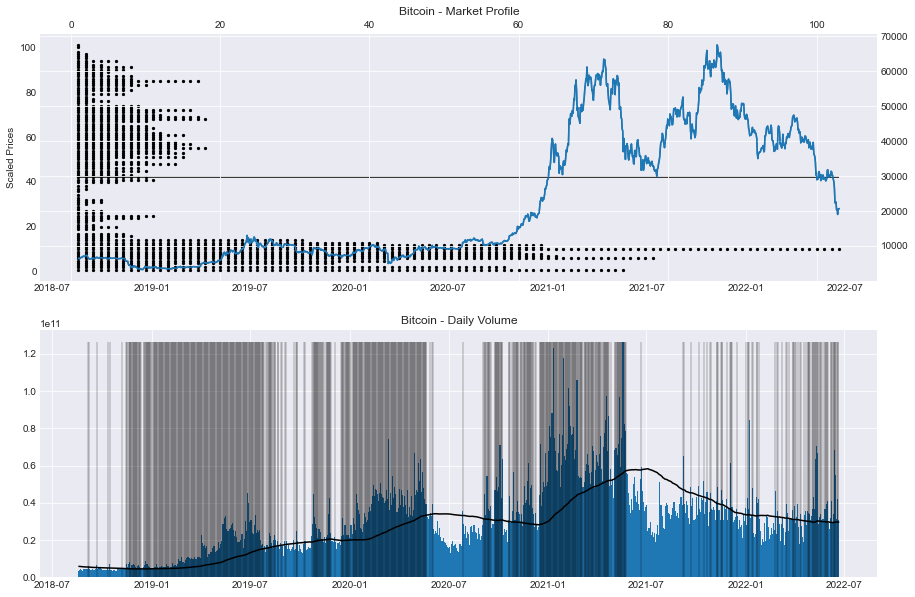

In [24]:
# Plotting the data
    # Price and Market Profile
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
ax1.plot(btc_price_volume.index, btc_price_volume['Close_Scaled'])
ax1.set_ylabel('Scaled Prices')
ax1.grid()
ax1.twiny()
plt.scatter(profile_df['Index'], profile_df['Value'],s=5, color ='black')
ax1.twinx()
plt.plot(btc_price_volume.index, btc_price_volume['Adj Close'])
ax1.hlines(42, xmax=btc_price_volume.index[-1], xmin=btc_price_volume.index[0], color='black')
ax1.set_title('Bitcoin - Market Profile')

    # Volume
ax2.bar(btc_price_volume.index, btc_price_volume['Volume'], width=2)
ax2.vlines(btc_price_volume[mask].index, ymin=0, ymax=btc_price_volume['Volume'].max(), color = 'black', alpha=0.2)
ax2.plot(btc_price_volume['Volume 200MA'], color ='black')
ax2.set_title('Bitcoin - Daily Volume')
None

The very first thing to notice here is how important the trading activity was around the $10,000 price point. In our data, the most traded area ranges from Bitcoins lows, to the $10,000 price mark. Because of that, we can assume that this is a very important price point for Bitcoin. That can be confirmed analyzing the Volume Indicator. We can see that the Bitcoin had a two periods of approximately 6 months of trading volume consistently higher than its 200 Moving Average.

However, the Bitcoin's price increased so fast that the next important trading points ranges from $30,000 to $60,000. Bitcoin had a very few trading activity around $10,000 to 20,000. In addition, the trading volume above $30,000 mark is significantly higher than the previous periods of high trading valume. One reason that can explain this phenomenom is the huge increase in interest people had for Bitcoin during this exact same period. In the grid below, we can see how the price chart, the volume and the interest for "crypto" in Google Trends share very similar pattern.


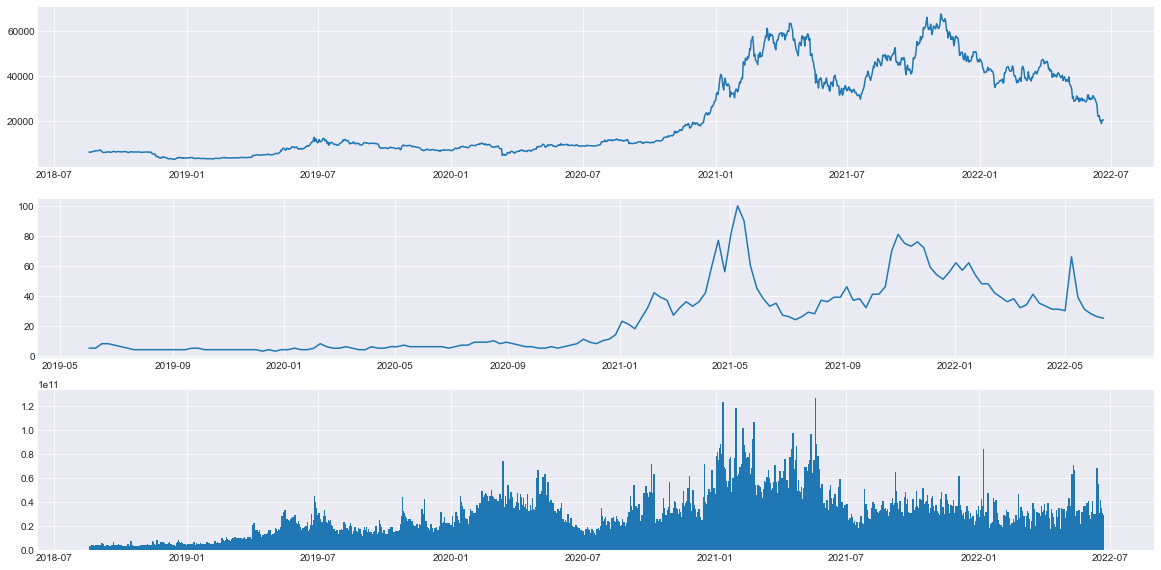

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,10))

ax1.plot(btc_price_volume['Adj Close'])

ax2.plot(stocks_crypto_trend['crypto'])

ax3.bar(btc_price_volume.index, btc_price_volume['Volume'], width=2)

None

Now let's compare the mean of each period of high trading volume to have a better idea of the differences among them.

In [26]:
# Filtering High Trading Volume periods
period_1 = btc_price_volume['Volume'].loc['2019-01-01':'2019-07-01'].mean()
period_2 = btc_price_volume['Volume'].loc['2020-01-01':'2021-07-01'].mean()
period_3 = btc_price_volume['Volume'].loc['2021-01-01':'2021-07-01'].mean()

2021 Volume vs 2020 Volume

In [27]:
f'Volume in 2021 was {format(((period_3 / period_2) - 1) * 100, ".2f")}% greater than the Volume in 2020'

'Volume in 2021 was 42.61% greater than the Volume in 2020'

2021 Volume vs 2019 Volume

In [28]:
f'Volume in 2021 was {format(((period_3 / period_1) - 1) * 100, ".2f")}% greater than the Volume in 2019'

'Volume in 2021 was 327.67% greater than the Volume in 2019'

After analyzing the Volume and the Price Profile, we can assume that most of the people people who invested in Bitcoin in 2021 had an average buy price above $30,000.

It is not a coincidence that prices fell very fast when Bitcoin lost it's $30,000 price point in June 2022. It is very likely that people's stop-loss were triggered causing a huge sell-off in the asset.

There is one final observation I'd like to make here. Notice how the people's interest towards cryptocurrencies fall when Bitcoin's prices are in a downtrend. It is completely normal to assume that prices of a given asset should increase as more people get interested in that particular asset. However, both variables should not have a strong correlation because the price of a given asset should mirror its intrinsic value rether than the people's interest towards it. 

Let's measure the correlation between Bitcoin prices and people's interest for crypto and do the same for stocks. 

In [29]:
# New stock data
sp500_3y = web.DataReader(
                '^GSPC',
                data_source='yahoo',
                start='2019-06-03',
                end='2022-06-06'
)['Adj Close'].to_frame().rename(columns={'Adj Close': 'SP500'})


nasdaq_3y = web.DataReader(
                '^IXIC',
                data_source='yahoo',
                start='2019-06-03',
                end='2022-06-06'
)['Adj Close'].to_frame().rename(columns={'Adj Close': 'NASDAQ100'})


# Importing Google Trends data for 'stocks' and 'crypto'
interest_crypto = pd.read_csv('crypto_search_trends.csv', parse_dates=True, index_col='Week')
interest_stocks = pd.read_csv('stocks_search_trends.csv')


# I had to add one day to the date points because google trends only returns sunday month days
    # Since there is no price data for the given dates this was necessary in order to concatenate both datasets
interest_stocks['Week'] = pd.to_datetime(interest_stocks['Week'])
interest_stocks['Week'] = interest_stocks['Week']+ pd.DateOffset(1) 
interest_stocks = interest_stocks.set_index('Week')

# Building the dataframe for google trends and stocks
interest_vs_price_stocks = pd.concat([
        interest_stocks['stocks'], 
        sp500_3y['SP500'], 
        nasdaq_3y['NASDAQ100']],
        axis=1, 
        join='inner').rename(columns={'stocks': 'Trend_Stocks'})

# Building the dataframe for google trends and crypto
interest_vs_price_bitcoin = pd.concat([
        interest_crypto['crypto'], 
        btc_price_volume['Adj Close']], 
        axis=1,
        join='inner').rename(columns={'crypto':'Trend_Crypto', 'Adj Close': 'BTCUSD'})


In [30]:
# Measuring Correlation Google Search Trend: Stocks vs SP500 vs NASDAQ100
interest_vs_price_stocks.corr()

,Trend_Stocks,SP500,NASDAQ100
Trend_Stocks,1.000000,0.029511,0.191118
SP500,0.029511,1.000000,0.965316
NASDAQ100,0.191118,0.965316,1.000000


<AxesSubplot:xlabel='Trend_Stocks', ylabel='SP500'>

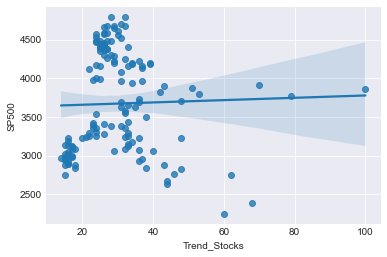

In [31]:
# Plotting the relationship Google Search: Stocks vs S&P 500
sns.regplot(interest_vs_price_stocks['Trend_Stocks'], interest_vs_price_stocks['SP500'])

<AxesSubplot:xlabel='Trend_Stocks', ylabel='NASDAQ100'>

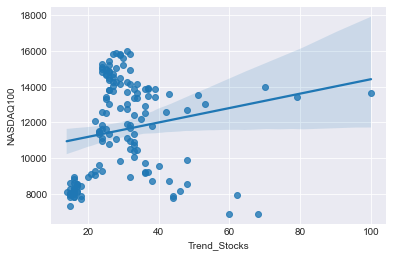

In [32]:
# Plotting the relationship Google Search: Stocks vs Nasdaq 100
sns.regplot(interest_vs_price_stocks['Trend_Stocks'], interest_vs_price_stocks['NASDAQ100'])

As we can see, people interest for 'stocks' and the prices for the S&P 500 and Nasdaq 100 have a very weak correlation. This is what we would expect under normal circunstances. The plots above shows us that even though prices have been historically high, this does not have an affect on people's interest towards it. Let's see if that is the same for Bitcoin

In [33]:
# Measuring Correlation: Google Trend Search: Crypto vs Bitcoin Price
interest_vs_price_bitcoin.corr()

,Trend_Crypto,BTCUSD
Trend_Crypto,1.000000,0.908956
BTCUSD,0.908956,1.000000


<AxesSubplot:xlabel='Trend_Crypto', ylabel='BTCUSD'>

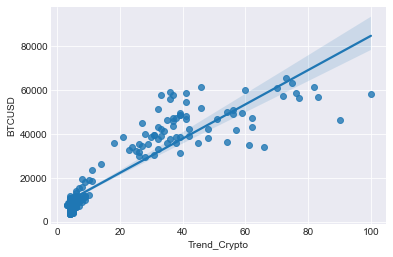

In [34]:
# Plotting the relationship Google Search: Crypto vs Bitcoin
sns.regplot(interest_vs_price_bitcoin['Trend_Crypto'], interest_vs_price_bitcoin['BTCUSD'])

Now we can see how strong the relationship is between people's interest for Bitcoin and it's price. First, the relationship between price and how the word "crypto" trends in Google is very high. Finally, the plot clearly show us that both variables have a strong positive relationship. As price increases, people's interest towards it also increases.

# "Bitcoin has proven not to be a diversifying asset"


 This was the exact words of a fund manager (unfortunately I can't remember his name) in a interview for Bloomberg Television and it is so inline with this section that I decided to use as a title.


 During the pandemic, cryptocurrency investors (billionaire Ray Dalio was one of them) came up with a thesis that Bitcoin was the "digital gold". What does that really means? I will explain.
 
 1. Bitcoin and Gold both have scarce supply. Therefore, its value should naturally increase with time as people gets more interested. A basic Supply and Demand thesis.
 2. Because of the first argument, Bitcoin's price shall not be correlated to risky assets (like stocks), just as gold's price, and it can be used to diversify a investment portfolio.
 3. Finally, and because of the both arguments above, Bitcoin should be considered as a store of value in times of uncertainty and high inflation. In other words, it is considered as a safe haven asset.

Although the first argument is actually true (Bitcoin's supply is actually fixed at 21 million), the other two arguments has proven not to be true. 

### Testing the Argument 2: The Correlation with Risky Assets

To test this argument I will be measuring the correlation among Bitcoin, Stocks (S&P 500 and Nasdaq 100 Indexes), Gold and the 10Y Treasury Yields Futures. 

The 10Y Tresury Yields Futures is important in this test because it is often used as a rate of discount in Discounted Cash Flow valuation models. A higher rate of discount will have a negative impact in risky assets price. Even though Bitcoin does not generate cash flows, The 10Y Yield is still relevant because a rise in yields make risky investments less attractive.

In [53]:
# Importing price data

# Bitcoin price data
btc_usd_5y = web.DataReader('BTC-USD', data_source='yahoo', start='2017-06-23', end='2022-06-22')['Adj Close'].to_frame().rename(columns={'Adj Close': 'BTCUSD'})

# SP500 price data
sp500_5y = web.DataReader('^GSPC', data_source='yahoo', start='2017-06-23', end='2022-06-22')['Adj Close'].to_frame().rename(columns={'Adj Close': 'SP500'})

# NASDAQ 100 price data
nasdaq_5y = web.DataReader('^IXIC', data_source='yahoo', start='2017-06-23', end='2022-06-22')['Adj Close'].to_frame().rename(columns={'Adj Close': 'NASDAQ100'})

# Gold futures price data
gold_usd_5y = web.DataReader('GC=F', data_source='yahoo', start='2017-06-23', end='2022-06-22')['Adj Close'].to_frame().rename(columns={'Adj Close': 'GOLD'})

# 10Y Treasure Bond Yields
treasure_yields_5y = web.DataReader('^TNX', data_source='yahoo', start='2017-06-23', end='2022-06-22')['Adj Close'].to_frame().rename(columns={'Adj Close': '10Y Treasury Yields Fut'})


# Prices Dataframe

prices_df = pd.concat([btc_usd_5y, sp500_5y, nasdaq_5y, gold_usd_5y, treasure_yields_5y], axis=1).dropna()

Let's begin measuring the correlation for 5 years

In [52]:
prices_df.corr()

,BTCUSD,SP500,NASDAQ100,GOLD,10Y Treasury Bonds
BTCUSD,1.000000,0.913334,0.907377,0.674904,-0.273282
SP500,0.913334,1.000000,0.980775,0.808166,-0.365131
NASDAQ100,0.907377,0.980775,1.000000,0.854990,-0.487467
GOLD,0.674904,0.808166,0.854990,1.000000,-0.713571
10Y Treasury Bonds,-0.273282,-0.365131,-0.487467,-0.713571,1.000000


<AxesSubplot:>

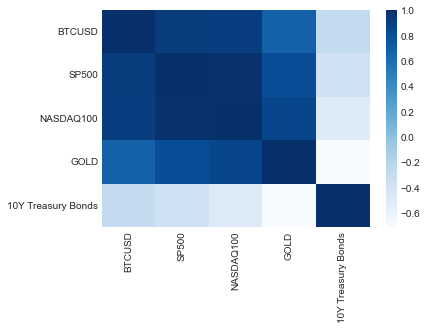

In [48]:
sns.heatmap(prices_df.loc[''].corr(), cmap="Blues")

As we can see, besides the 10Y Treasury Futures, during 5 years all markets have been very correlated. Prices from all asset classes have been trending upwards most of the time as markets experienced a historical strong bull market.

However, safe haven assets should shine in period of deep market uncertainty. COVID-19 was a period of uncertainty but because the governments boosted the economy with high doses of steroids, that period of uncertainty didn't last. On the other hand, in 2022 we are facing a true deep market turmoil where inflation is skyrocketing, what is forcing the Federal Reserve to raise interest rates and possibly throwing the economy into recession.

Let's measure the correlation among these assets in 2022

In [56]:
# Correlation Year-to-Date
prices_df.loc['2022-01-03':].corr()

,BTCUSD,SP500,NASDAQ100,GOLD,10Y Treasury Yields Fut
BTCUSD,1.000000,0.904132,0.896552,0.368405,-0.654529
SP500,0.904132,1.000000,0.987466,0.091362,-0.726158
NASDAQ100,0.896552,0.987466,1.000000,0.067416,-0.786443
GOLD,0.368405,0.091362,0.067416,1.000000,0.032647
10Y Treasury Yields Fut,-0.654529,-0.726158,-0.786443,0.032647,1.000000


<AxesSubplot:>

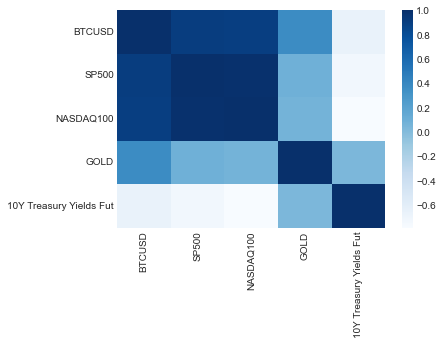

In [57]:
sns.heatmap(prices_df.loc['2022-01-03':].corr(), cmap="Blues")

According to the analysis, the Gold's correlation to the stock market is near zero, while Bitcoin remained correlated to risky assets. In addition, showing the same behavior as risky assets, the negative correlation with Treasury yields increased drastically for Bitcoin, while the Gold's correlation to yields remained also remained near zero.

That tackles the argument 2 and we can conclude that Bitcoin <b> does not diversify a investment portfolio </b>

## Testing the Argument 3: Bitcoin as Safe Haven and Store of Value

After analyzing the correlation between Bitcoin and other markets, we already have a sense that the crypto cannot be considered as a safe haven asset. However, in order to get better conclusion as if it can be considered as a alternative to store value, we need to measure its volatility and compare it to other asset classes.

Again, at this point we've seen that the volatility for bitcoin is very high and we could tackle this argument immediately. But let's calculate it and compare it to other markets.

In [59]:
for asset in prices_df.columns[0:4]:
   print(f'The annualized volatility for {asset} is currently at: {format(((prices_df[asset] / prices_df[asset].shift()).std() * (252 ** (1/2))) * 100, ".2f")}%')

The annualized volatility for BTCUSD is currently at: 78.64%
The annualized volatility for SP500 is currently at: 20.66%
The annualized volatility for NASDAQ100 is currently at: 24.08%
The annualized volatility for GOLD is currently at: 14.85%


According to the analysis, the volatility for bitcoin is almost four times higher than the volatility for stocks and more five times higher than the volatility for gold.

Because of that, we can also tackle the third argument that states that bitcoin can be use as a safe haven asset and store of value.

After analyzing both correlation and the volatility for Bitcoin, we can conclude that the investor that adds it to the portfolio is actually increasing the overall risk instead of reducing it by diversifying it.